<a href="https://colab.research.google.com/github/canhtc/KTCNPM/blob/master/K61_XT%2BAC%3D%3ETotal_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
from glob import glob
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:
path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/*.csv'
path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/test_k59/dataH.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k60/datacsv/test/data_6.csv'

# path_train = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/train/*.csv'
# path_test = '/content/driver/My Drive/Colab data/ktcnpm_data/k61/test/data_10.csv'

In [4]:
files = glob(path_train)
x_input =[]
y_output=[]
print(files)
for file in files:
  data = pd.read_csv(file)
  data_xt = data['XT'].values
  data_ac = data['AC'].values/1000
  data_total_ac = data['TOTAL_AC'].values/1000

  # data = []
  # data.append(data_xt)
  # data.append(data_ac)
  # data.append(data_total_ac)

  # data = np.asarray(data)

  # scaler = StandardScaler()

  
  # data = scaler.fit_transform(data)

  # data_xt = data[0]
  # data_ac = data[1]
  # data_total_ac = data[2]

  print(data_total_ac)
  # scaler = MinMaxScaler()
  

#dung de lay du lieu theo cap
  data_input2D = []
  data_output1D = []
  steps = 3
  
  for i in range(0,len(data_xt)-steps+1):
    temp_3D = []
    for k in range(i, i+steps):
      temp_2D = []
      temp_2D.append(data_xt[k])
      temp_2D.append(data_ac[k])
      
      temp_3D.append(temp_2D)

    data_output1D.append(data_total_ac[i])

    data_input2D.append(temp_3D)
  x_input.append(data_input2D)
  y_output.append(data_output1D)

x_input = np.concatenate( x_input, axis=0 )
y_output = np.concatenate( y_output, axis=0 )
x_train = np.asarray(x_input)
y_train = np.asarray(y_output)

x_train = x_train.reshape(-1,3,2)
y_train = y_train.reshape(-1,1)
print(x_train.shape)
print(y_train.shape)

['/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataA.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataB.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataC.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataD.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataE.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataF.csv', '/content/driver/My Drive/Colab data/ktcnpm_data/k59/datacsv/train_k59/dataG.csv']
[0.25969 0.25969 0.25969 0.25969 0.25969 0.25969 0.25969 0.25969 0.25969
 0.25969 0.25969 0.25969 0.25969 0.25969 0.25969 0.25969 0.25969 0.25969
 0.25969]
[0.52935 0.52935 0.52935 0.52935 0.52935 0.52935 0.52935 0.52935 0.52935
 0.52935 0.52935 0.52935 0.52935 0.52935 0.52935 0.52935 0.52935 0.52935
 0.52935 0.52935 0.52935]
[0.3247 0.3247 0.3247 0.3247 0.3247 0.3247 0.3247 0.3247 0.3247 0.3247
 0.3247 0.3247]
[0.

In [5]:
n_input = 3
n_features = 2
units = 10
model = Sequential()
model.add(LSTM(units, activation='relu', input_shape=(n_input, n_features),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units, activation='relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units, activation='relu', return_sequences = False))
model.add(Dropout(0.3))
model.add(Dense(units = 1))
model.summary()
adam = Adam(lr=0.001) 
model.compile(optimizer=adam, loss='mse')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 10)             520       
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 10)             840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [6]:
model.fit(x_train, y_train, epochs=1000, validation_split=0.1, verbose=1, batch_size=3)


Train on 81 samples, validate on 10 samples
Epoch 1/1000
81/81 [==============================] - 2s 22ms/step - loss: 0.4769 - val_loss: 0.4184
Epoch 2/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.3953 - val_loss: 0.3007
Epoch 3/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.3137 - val_loss: 0.1415
Epoch 4/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.2051 - val_loss: 0.0227
Epoch 5/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1871 - val_loss: 0.0119
Epoch 6/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1417 - val_loss: 0.0024
Epoch 7/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1775 - val_loss: 0.0036
Epoch 8/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1290 - val_loss: 0.0106
Epoch 9/1000
81/81 [==============================] - 0s 2ms/step - loss: 0.1380 - val_loss: 0.0101
Epoch 10/1000
81/81 [==============================] - 

actually:  [989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92
 989.92 989.92 989.92 989.92 989.92 989.92 989.92 989.92]
model:  [[983.8304 ]
 [948.23694]
 [930.23267]
 [929.39996]
 [921.92206]
 [926.8058 ]
 [961.70166]
 [967.759  ]
 [973.86255]
 [978.37354]
 [984.69415]
 [988.3684 ]
 [991.0645 ]
 [995.0798 ]
 [995.2955 ]
 [986.1383 ]]
pecent:  [array([99.38484], dtype=float32), array([95.78925], dtype=float32), array([93.97049], dtype=float32), array([93.886375], dtype=float32), array([93.13097], dtype=float32), array([93.62431], dtype=float32), array([97.14943], dtype=float32), array([97.76133], dtype=float32), array([98.37791], dtype=float32), array([98.833595], dtype=float32), array([99.47209], dtype=float32), array([99.84326], dtype=float32), array([99.88438], dtype=float32), array([99.47877], dtype=float32), array([99.45698], dtype=float32), array([99.61798], dtype=float32)]
accuracy:  [97.47888]


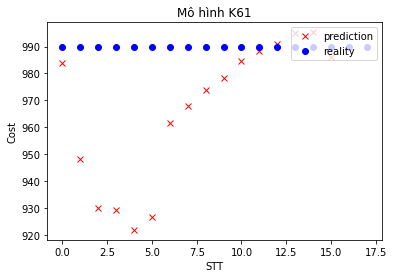

In [7]:
test = pd.read_csv(path_test)
ip_test_xt = test['XT'].values.astype('float64') 
ip_test_ac = test['AC'].values.astype('float64')/1000
test_output = test['TOTAL_AC'].values.astype('float64')

# scaler = MinMaxScaler(feature_range=(0, 1))
# print(test_output)
# ip_test_xt = scaler.fit_transform(ip_test_xt.reshape(-1,1))
# ip_test_ac = scaler.fit_transform(ip_test_ac.reshape(-1,1))
# test_output = scaler.fit_transform(test_output.reshape(-1,1))
x_input=[]
y_output =[]

data_input2D = []
data_output1D = []
steps = 3

for i in range(0,len(ip_test_xt)-steps+1):
  temp_3D = []
  for k in range(i, i+steps):
    temp_2D = []
    temp_2D.append(ip_test_xt[k])
    temp_2D.append(ip_test_ac[k])
    
    temp_3D.append(temp_2D)

  data_input2D.append(temp_3D)
x_input.append(data_input2D)


x_input = np.concatenate( x_input, axis=0 )


x_test = x_input.reshape(-1,3,2)

result = model.predict(x_test)

result = result*1000
# result = scaler.inverse_transform(result)


plt.plot(result,'x', color='r')
plt.plot(test_output, 'o' ,color='b')
plt.title("Mô hình K61")
plt.xlabel("STT")
plt.ylabel("Cost")
# mplcursors.cursor(hover=True)
print("actually: ",test_output)
print("model: ", result)
percent = []
acc = 0
for i in range(0,result.size):
  p = (1- abs(test_output[i]-result[i])/test_output[i])*100
  percent.append(p)
  acc += p
print("pecent: ", percent)
print("accuracy: ", acc/(result.size))

plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()